In [1]:
import pandas as pd

In [2]:
from collections import defaultdict

In [7]:
data = pd.read_csv('/content/mapped.bed 2', sep = '\t', header = None)

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2,chr1,90919,91937,chr1:91382-91550|carroll_ctcf_mcf7_v45m`2_GTGG...,16.2951,+,chr1,90838.0,91006.0,IH02_00.pairs@15152,168.0,+
1,2,chr1,90919,91937,chr1:91382-91550|carroll_ctcf_mcf7_v45m`2_GTGG...,16.2951,+,chr1,90846.0,90998.0,IH02_04.pairs@4163,152.0,+
2,2,chr1,90919,91937,chr1:91382-91550|carroll_ctcf_mcf7_v45m`2_GTGG...,16.2951,+,chr1,90851.0,91000.0,IH02_04.pairs@4164,149.0,+
3,2,chr1,90919,91937,chr1:91382-91550|carroll_ctcf_mcf7_v45m`2_GTGG...,16.2951,+,chr1,90850.0,91014.0,IH02_00.pairs@15153,164.0,+
4,2,chr1,90919,91937,chr1:91382-91550|carroll_ctcf_mcf7_v45m`2_GTGG...,16.2951,+,chr1,90900.0,90965.0,IH02_00.pairs@15164,65.0,+


In [11]:
counts = defaultdict(int)

In [14]:
data = data.dropna()

In [15]:
for index, row in data.iterrows():

    start1, end1 = int(row[2]), int(row[3])
    start2, end2 = int(row[8]), int(row[9])


    c1 = (start1 + end1) // 2
    c2 = (start2 + end2) // 2

    x = c2 - c1

    y = end2 - start2

    counts[(x, y)] += 1


In [16]:
X, Y, Z = zip(*[(x, y, z) for (x, y), z in counts.items()])

In [17]:
import matplotlib.pyplot as plt


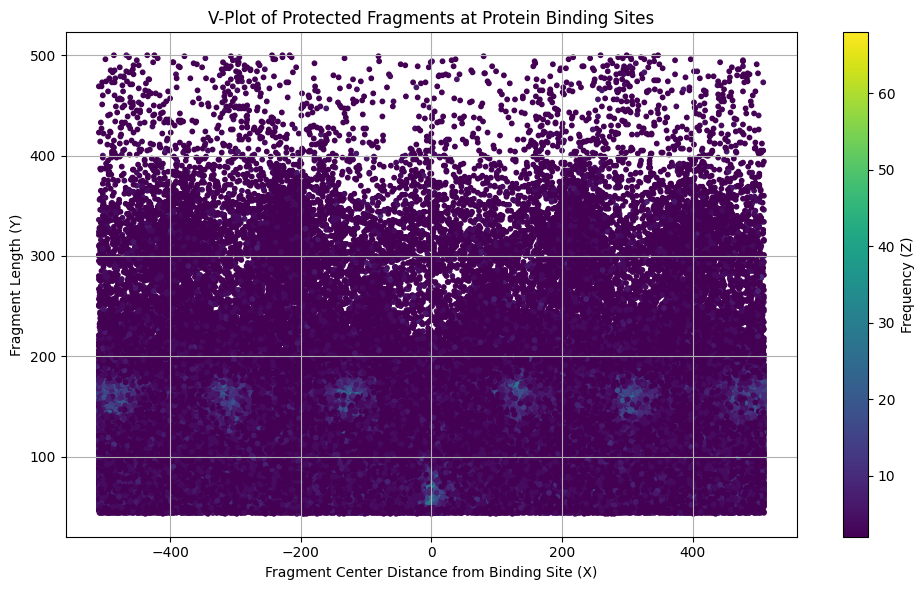

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, c=Z, cmap='viridis', s=10)
plt.colorbar(label="Frequency (Z)")
plt.title("V-Plot of Protected Fragments at Protein Binding Sites")
plt.xlabel("Fragment Center Distance from Binding Site (X)")
plt.ylabel("Fragment Length (Y)")
plt.grid(True)
plt.tight_layout()
plt.show()